In [1]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt


# Using numpy

In [2]:
# the list of numbers
z = [1,2,3]

# compute the softmax result
num = np.exp(z)
den = np.sum( np.exp(z) )
sigma = num / den

print(sigma)
print(np.sum(sigma))

[0.09003057 0.24472847 0.66524096]
1.0


[ 1 -4 -2  6  2  5  9  4  9 13  6 13  7 -4 14  3  9 11  9  0 12  5  0  9
 14]


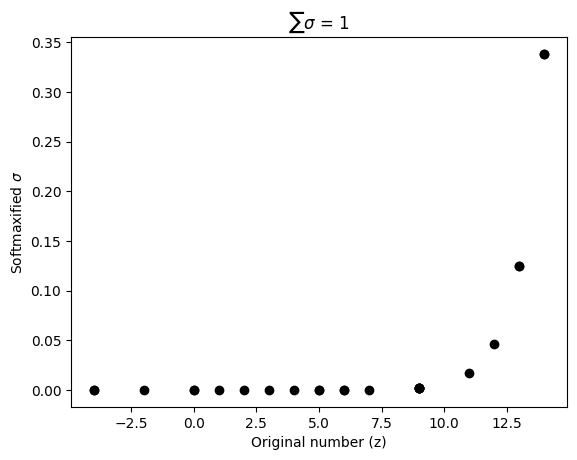

In [4]:
# repeat with some random integers
z = np.random.randint(-5,high=15,size=25)
print(z)

# compute the softmax result
num = np.exp(z)
den = np.sum( num )
sigma = num / den

# compare
plt.plot(z,sigma,'ko')
plt.xlabel('Original number (z)')
plt.ylabel('Softmaxified $\\sigma$')
# plt.yscale('log')
plt.title('$\\sum\\sigma$ = %g' %np.sum(sigma))
plt.show()

# Using PyTorch

In [6]:
zTorch = torch.tensor(z,dtype=torch.float64)

# using a function
F.softmax(zTorch,dim=-1)

tensor([7.6454e-07, 5.1514e-09, 3.8064e-08, 1.1347e-04, 2.0782e-06, 4.1742e-05,
        2.2790e-03, 1.5356e-05, 2.2790e-03, 1.2443e-01, 1.1347e-04, 1.2443e-01,
        3.0844e-04, 5.1514e-09, 3.3824e-01, 5.6492e-06, 2.2790e-03, 1.6840e-02,
        2.2790e-03, 2.8126e-07, 4.5776e-02, 4.1742e-05, 2.8126e-07, 2.2790e-03,
        3.3824e-01], dtype=torch.float64)

## Temperatures

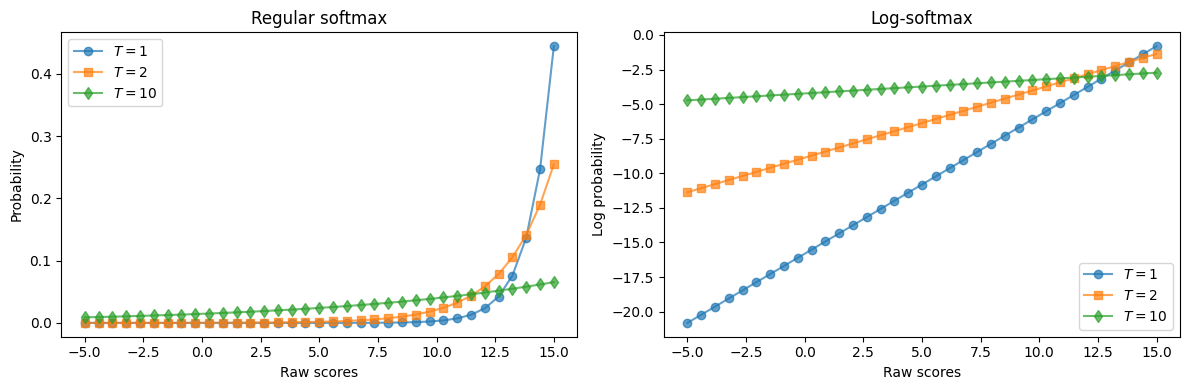

In [7]:
# list of temperatures to use (T = 1/beta)
temperatures = [ 1, 2, 10 ]

rawscores = torch.linspace(-5,15,35)
shapes = 'osd'

_,axs = plt.subplots(1,2,figsize=(12,4))
for temp,s in zip(temperatures,shapes):

  # scale the scores by temperature
  heatedScores = rawscores / temp

  # and plot
  axs[0].plot(rawscores,F.softmax(heatedScores,dim=0),f'{s}-',alpha=.7,label=r'$T=%g$'%temp)
  axs[1].plot(rawscores,F.log_softmax(heatedScores,dim=0),f'{s}-',alpha=.7,label=r'$T=%g$'%temp)


axs[0].legend()
axs[0].set(xlabel='Raw scores', ylabel='Probability',title='Regular softmax')
axs[1].legend()
axs[1].set(xlabel='Raw scores', ylabel='Log probability',title='Log-softmax')

plt.tight_layout()
plt.show()